In [1]:
import pandas as pd

col_name = [
    'Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition'
]
data = pd.read_csv("realest.csv", names=col_name, header=0)

In [2]:
data.agg(['min', 'max'])

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
min,32.0,1.0,539.0,4.0,24.0,418.0,1.0,0.0,0.0
max,90.0,8.0,2295.0,12.0,50.0,2752.0,3.0,2.0,1.0


In [3]:
data["Space"] = data["Space"].apply(lambda x: x / 100)
data["Tax"] = data["Tax"].apply(lambda x: x / 100)
data["Lot"] = data["Lot"].apply(lambda x: x / 10)
data.agg(['min', 'max'])

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
min,32.0,1.0,5.39,4.0,2.4,4.18,1.0,0.0,0.0
max,90.0,8.0,22.95,12.0,5.0,27.52,3.0,2.0,1.0


single variable linear regression

In [4]:
space_price = data[["Space", "Price"]].dropna().to_numpy()
space_price

array([[ 9.67, 53.  ],
       [ 8.15, 55.  ],
       [ 9.  , 56.  ],
       [10.07, 58.  ],
       [11.  , 64.  ],
       [ 8.97, 44.  ],
       [14.  , 49.  ],
       [22.61, 70.  ],
       [12.9 , 72.  ],
       [21.04, 82.  ],
       [22.4 , 85.  ],
       [ 6.41, 45.  ],
       [ 8.62, 47.  ],
       [10.43, 49.  ],
       [13.25, 56.  ],
       [ 7.82, 60.  ],
       [11.26, 62.  ],
       [12.26, 64.  ],
       [ 9.29, 66.  ],
       [11.37, 35.  ],
       [ 7.43, 38.  ],
       [ 5.96, 43.  ],
       [ 8.03, 46.  ],
       [ 6.96, 46.  ],
       [ 6.91, 50.  ],
       [10.23, 65.  ],
       [ 9.64, 54.  ],
       [ 7.99, 58.  ],
       [ 9.43, 58.  ],
       [10.41, 61.  ],
       [11.24, 62.  ],
       [ 8.55, 46.  ],
       [14.08, 49.  ],
       [22.3 , 70.  ],
       [12.99, 72.  ],
       [21.73, 81.  ],
       [22.78, 88.  ],
       [ 5.83, 45.  ],
       [ 8.74, 47.  ],
       [10.53, 47.  ],
       [12.55, 55.  ],
       [ 7.85, 61.  ],
       [11.04, 64.  ],
       [12.

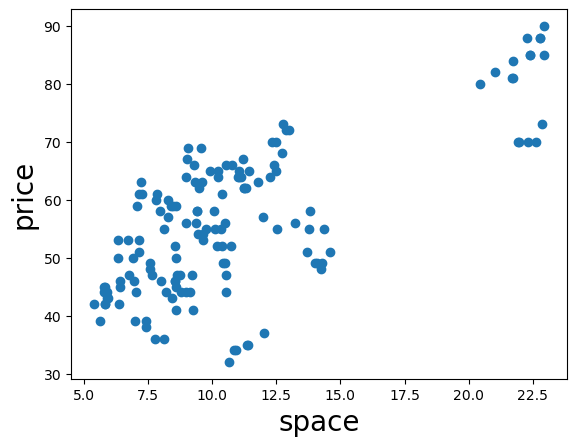

In [5]:
import matplotlib.pyplot as plt

xpoints = space_price[:, :-1]
ypoints = space_price[:, -1:]
plt.xlabel('space', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.plot(xpoints, ypoints, 'o')
plt.show()

In [6]:
import gd

w, b = gd.extract_params(space_price)
w, b

(array([4.57459391]), 0.4956843159146543)

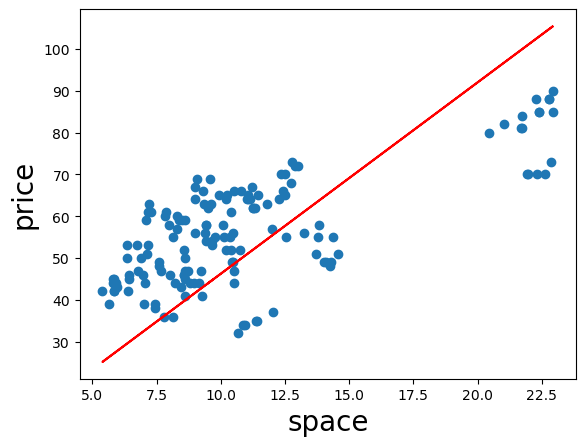

In [7]:
xpoints = space_price[:, :-1]
ypoints = space_price[:, -1:]
plt.xlabel('space', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.plot(xpoints, ypoints, 'o')
plt.plot(xpoints, w[0] * xpoints + b, 'r')
plt.show()

multiple variables linear regression

In [8]:
all_params_data = data[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition', 'Price']].dropna().to_numpy()

In [9]:
import gd
import numpy as np
w, b = gd.extract_params(all_params_data)
print(w, b)
params = all_params_data[:, :-1]
predicted_values = gd.predicted_value(w, b, params)
actual_value = all_params_data[:, -1:]
np.hstack((predicted_values, actual_value))

[0.62239749 2.06602868 1.37821514 0.72369675 1.65275065 0.33383136
 0.18851543 0.06629759] 0.22315286529729436


array([[ 43.99868955,  53.        ],
       [ 46.45209293,  55.        ],
       [ 47.18512363,  56.        ],
       [ 51.2737814 ,  58.        ],
       [ 58.59197043,  64.        ],
       [ 50.98642239,  44.        ],
       [106.068465  ,  70.        ],
       [ 81.28772273,  82.        ],
       [ 94.41204343,  85.        ],
       [ 39.52106627,  45.        ],
       [ 41.79045059,  47.        ],
       [ 49.31542968,  49.        ],
       [ 68.06554567,  56.        ],
       [ 42.00445154,  60.        ],
       [ 51.59964465,  62.        ],
       [ 54.20270838,  66.        ],
       [ 48.99498502,  35.        ],
       [ 37.49732324,  38.        ],
       [ 41.65770411,  46.        ],
       [ 33.22180934,  46.        ],
       [ 37.59741805,  50.        ],
       [ 52.33741902,  65.        ],
       [ 42.8019585 ,  54.        ],
       [ 45.91231851,  58.        ],
       [ 47.56681103,  58.        ],
       [ 52.00928616,  61.        ],
       [ 59.58364251,  62.        ],
 